# PROJECT NAME: CLASSIFICATION ON ROAD TRAFFIC ACCIDENT DATA

## BY: "Laiba Memon"

### IMPORTING THE REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import time
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error

### IMPORTING THE DATASET

In [3]:
data=pd.read_csv("RTA Dataset.csv")
data.head()   # Head method will print the starting 5 columns of the dataset

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### DATA PREPROCESSING

In [4]:
# tail method will print the last columns of the dataset
data.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [5]:
# Shape method will tell us the rows and columns of the dataset
data.shape

(12316, 32)

In [6]:
data.isnull().sum()
# Checking the null values if exist, in our dataset

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [7]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

### HANDLING MISSING VALUES THROUGH IMPUTATION

In [15]:
impute_cols = [x for x in data.isna().sum()[data.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = data[feat].mode()[0] 
    data[feat].fillna(mode, inplace=True)

In [16]:
data.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [17]:
data.info()
# Checking the Datatype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

In [18]:
#Converting the Data Column to the Datetime Format
data['Time']=pd.to_datetime(data['Time'])

In [19]:
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2022-10-20 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,2022-10-20 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2022-10-20 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2022-10-20 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2022-10-20 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2022-10-20 16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,2022-10-20 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,2022-10-20 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,2022-10-20 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [20]:
# Checking the Unique Values in our Dataset
data.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [22]:
model=LabelEncoder()
list=['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision','Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity']
for i in list:
    data[i]=model.fit_transform(data[i])
# Doing LabelEncoding to convert the Datatype Object into int 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         12316 non-null  int64
 1   Day_of_week                  12316 non-null  int32
 2   Age_band_of_driver           12316 non-null  int32
 3   Sex_of_driver                12316 non-null  int32
 4   Educational_level            12316 non-null  int32
 5   Vehicle_driver_relation      12316 non-null  int32
 6   Driving_experience           12316 non-null  int32
 7   Type_of_vehicle              12316 non-null  int32
 8   Owner_of_vehicle             12316 non-null  int32
 9   Service_year_of_vehicle      12316 non-null  int32
 10  Defect_of_vehicle            12316 non-null  int32
 11  Area_accident_occured        12316 non-null  int32
 12  Lanes_or_Medians             12316 non-null  int32
 13  Road_allignment              12316 non-null  i

In [24]:
data['Accident_severity'].value_counts()

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

In [25]:
data.describe()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,...,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,593.957941,2.980513,1.292952,0.957535,3.208347,0.333793,1.943732,5.100357,2.693975,3.532559,...,2.864566,1.453962,1.148019,2.620981,2.293927,0.674082,2.000081,4.836067,6.916044,1.832819
std,265.313817,2.059712,1.337520,0.263767,1.361538,0.741375,1.236146,4.548810,0.877637,1.800526,...,2.057282,1.331309,0.742709,2.121114,0.587734,1.221069,0.121233,0.893611,5.101751,0.406082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,380.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,3.000000,2.000000,...,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,5.000000,1.000000,2.000000
50%,632.000000,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,5.000000,3.000000,5.000000,...,2.000000,1.000000,1.000000,3.000000,2.000000,0.000000,2.000000,5.000000,9.000000,2.000000
75%,801.000000,5.000000,2.000000,1.000000,4.000000,0.000000,3.000000,8.000000,3.000000,5.000000,...,3.000000,3.000000,2.000000,5.000000,3.000000,1.000000,2.000000,5.000000,11.000000,2.000000
max,1073.000000,6.000000,4.000000,2.000000,6.000000,3.000000,6.000000,16.000000,3.000000,5.000000,...,12.000000,3.000000,2.000000,5.000000,3.000000,6.000000,4.000000,8.000000,19.000000,2.000000


### DATA VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

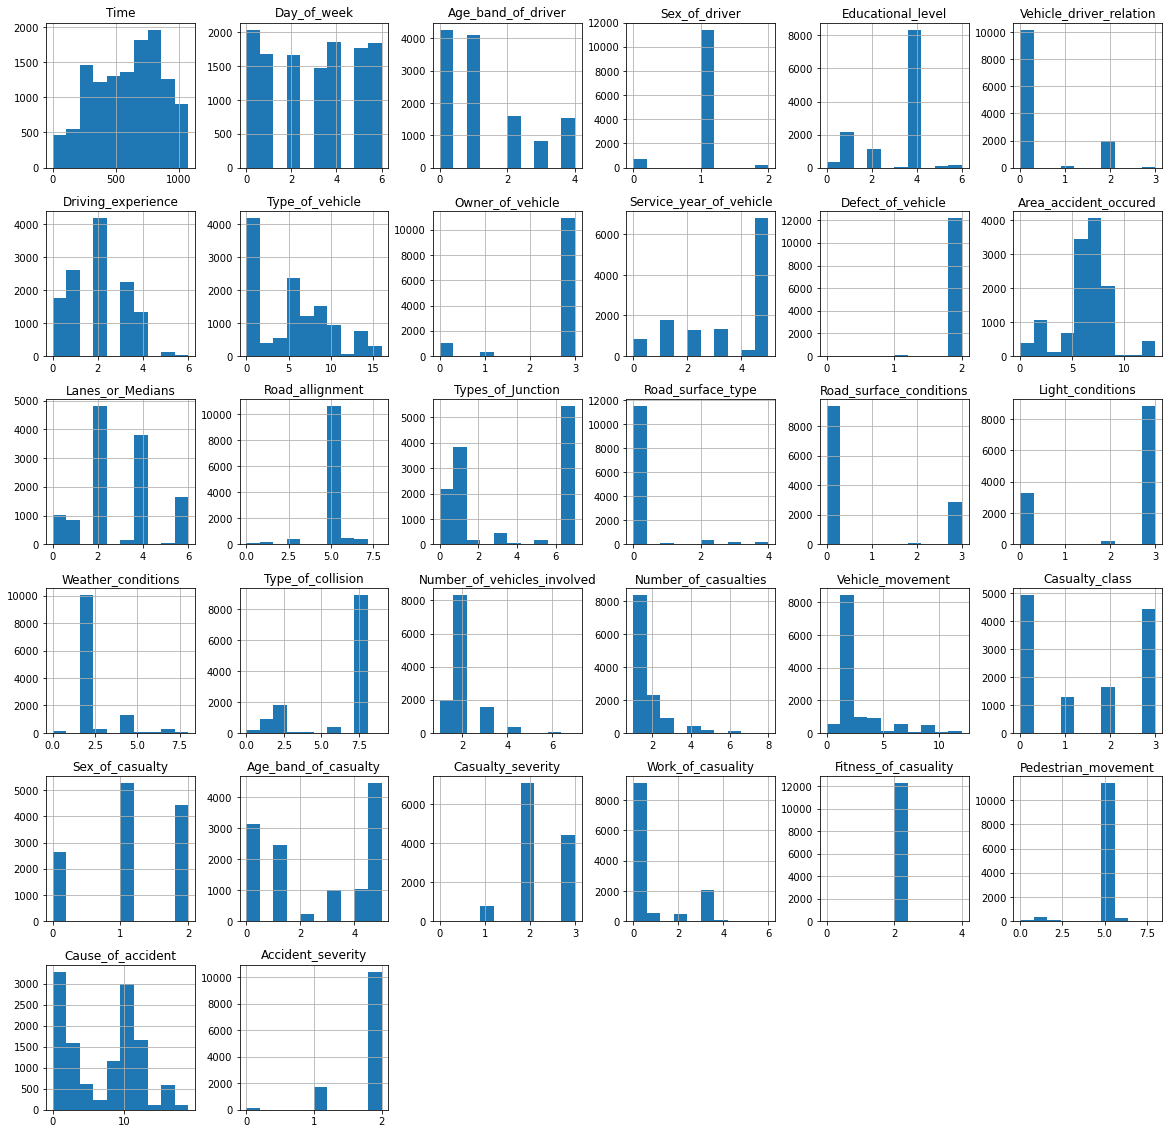

In [36]:
data.hist(figsize=(20,20))
plt.show

In [37]:
data['Number_of_casualties'].value_counts()

1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64

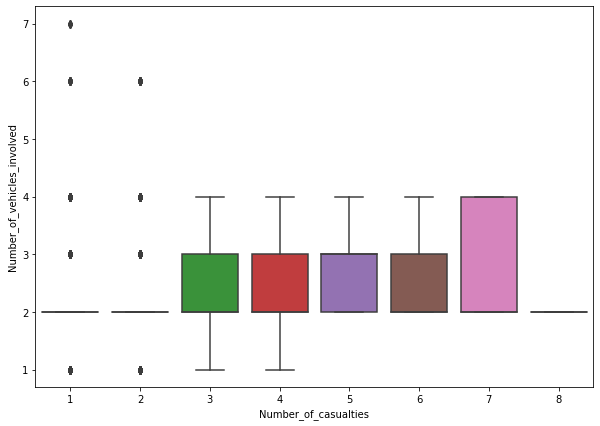

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

In [39]:
# Here this graph is showing the outliers 
# so we need to remove the outliers
df=data._get_numeric_data()
column=df.columns.to_list()

for col in column:
    Q1,Q3=data[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    LB=Q1-(1.5*IQR)
    UB=Q3+(1.5*IQR)
    data[col]=np.where(data[col] <LB,LB,data[col])
    data[col]=np.where(data[col]>UB,UB,data[col])
    
for col in column:
    data[col]=df[col]


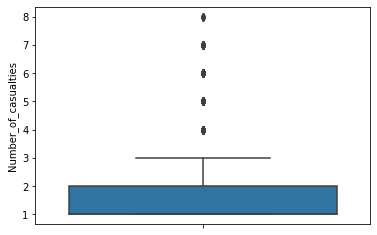

In [42]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

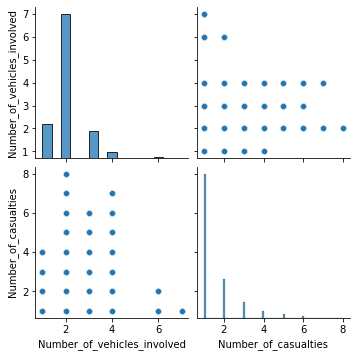

In [43]:
sns.pairplot(data[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Accident_severity', ylabel='count'>

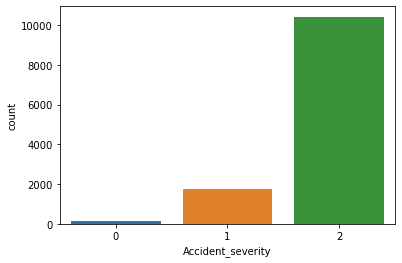

In [49]:
sns.countplot(data['Accident_severity'])

# O MEANS FATAL INJURY
# 1 MEANS SERIOUS INJURY
# 2 MEANS SLIGHT INJURY

c:\Anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


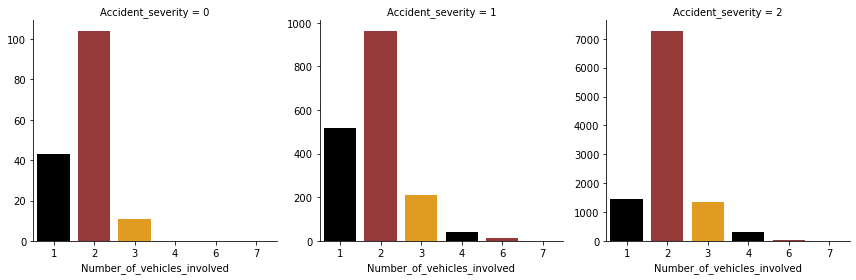

In [46]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

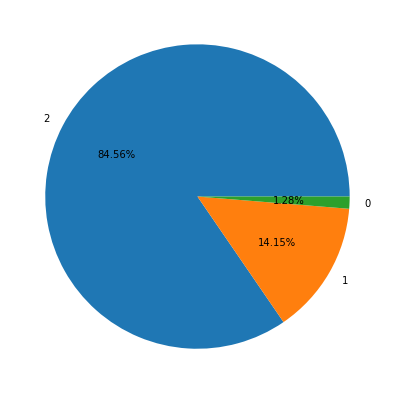

In [47]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

### FINDING CORRELATION BETWEEN DATA

<AxesSubplot:>

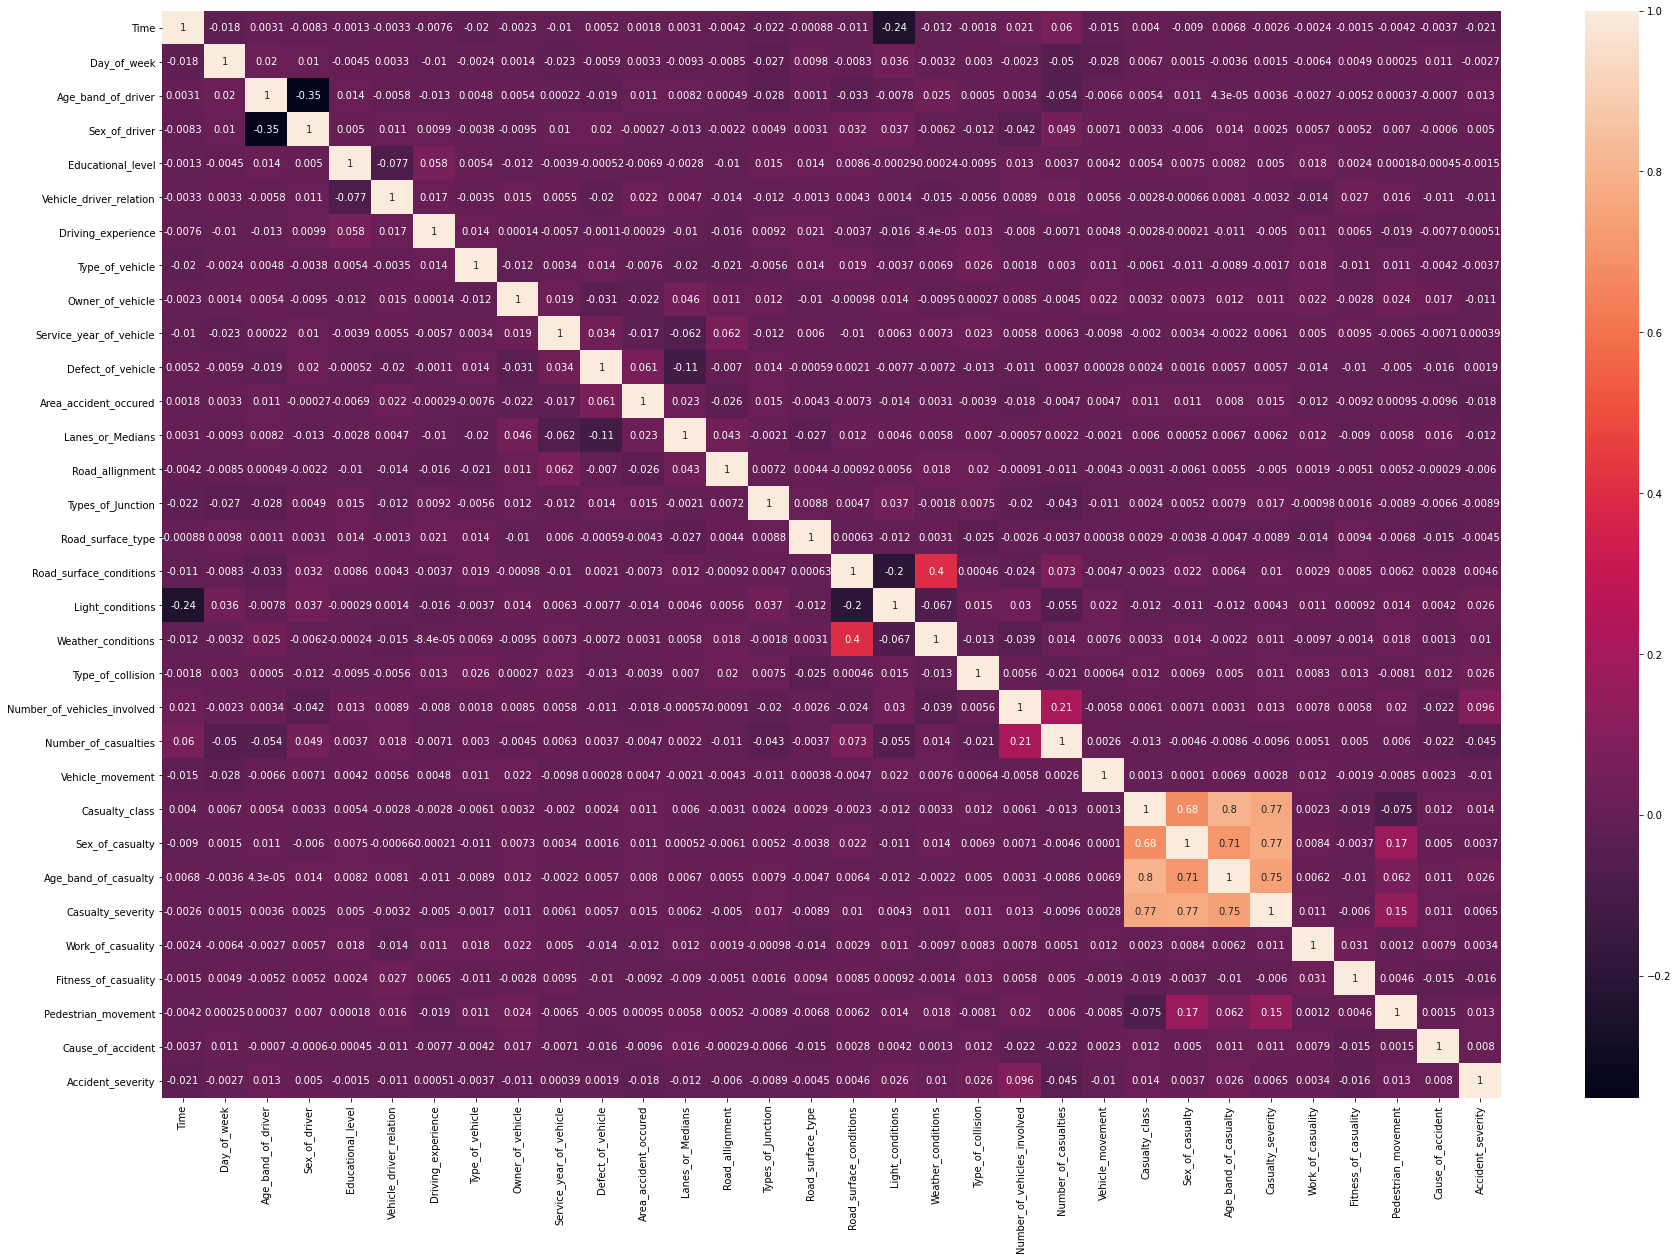

In [55]:
data.corr()
plt.figure(figsize=[30,20])
sns.heatmap(data.corr(),annot=True)



In [57]:
data.drop(['Time','Service_year_of_vehicle','Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality'], axis = 1, inplace = True)

In [58]:
data.shape

(12316, 27)

### FEATURE SELECTION

In [59]:
x=data.drop('Accident_severity',axis=1)
y=data['Accident_severity']

In [60]:
print(x)

       Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0                1                   0              1                  0   
1                1                   1              1                  4   
2                1                   0              1                  4   
3                3                   0              1                  4   
4                3                   0              1                  4   
...            ...                 ...            ...                ...   
12311            6                   1              1                  4   
12312            3                   4              1                  1   
12313            3                   2              1                  4   
12314            3                   0              0                  4   
12315            3                   0              1                  4   

       Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0               

In [61]:
print(y)

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Accident_severity, Length: 12316, dtype: int32


### FEATURE SCALING


In [63]:
std=StandardScaler()
x=std.fit_transform(x)
print(x)

[[-0.96158762 -0.96671831  0.16100133 ...  1.20139737  0.1834577
   0.4084951 ]
 [-0.96158762 -0.2190354   0.16100133 ...  1.20139737  0.1834577
   1.78062863]
 [-0.96158762 -0.96671831  0.16100133 ... -0.50012172  0.1834577
  -1.35567659]
 ...
 [ 0.00946134  0.52864752  0.16100133 ... -0.50012172  0.1834577
  -1.15965751]
 [ 0.00946134 -0.96671831 -3.63037988 ...  1.20139737  0.1834577
  -0.37558121]
 [ 0.00946134 -0.96671831  0.16100133 ... -0.50012172 -4.29294664
  -1.15965751]]


### DATA MODELLING

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x.shape,x_train.shape,x_test.shape

((12316, 26), (9852, 26), (2464, 26))

# LOGISTIC REGRESSION ALGORITHM

In [70]:
model=LogisticRegression()

In [71]:
model.fit(x_train,y_train)

LogisticRegression()

In [73]:
y_pred=model.predict(x_test)
print(y_pred)

[2 2 2 ... 2 2 2]


In [78]:
Accuracy=accuracy_score(y_pred,y_test)
print("The Accuracy for LogisticRegression is",Accuracy)

The Accuracy for LogisticRegression is 0.84375


# DECISION TREE CLASSIFIER ALGORITHM

In [80]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [81]:
y_pred=model.predict(x_test)
print(y_pred)

[2 1 2 ... 1 2 2]


In [82]:
Accuracy=accuracy_score(y_pred,y_test)
print("The Accuracy for Decision Tree Classifier is",Accuracy)

The Accuracy for Decision Tree Classifier is 0.7443181818181818


# SUPPORT VECTOR CLASSIFIER ALGORITHM

In [86]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC()

In [87]:
y_pred=model.predict(x_test)
print(y_pred)

[2 2 2 ... 2 2 2]


In [88]:
Accuracy=accuracy_score(y_pred,y_test)
print("The Accuracy for Support Vector Classifier is",Accuracy)

The Accuracy for Support Vector Classifier is 0.84375


# RANDOM FOREST CLASSIFIER ALGORITHM

In [89]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
y_pred=model.predict(x_test)
print(y_pred)

[2 2 2 ... 2 2 2]


In [91]:
Accuracy=accuracy_score(y_pred,y_test)
print("The Accuracy for Random Forest Classifier is",Accuracy)

The Accuracy for Random Forest Classifier is 0.846185064935065


# THE BEST ACCURACY ABOVE ALL'S

In [ ]:
 ABOVE ALL ALGORITHMS THE BEST ACCURACY ARE FOUND IN RANDOM FOREST CLASSIFIER,LOGISTIC REGRESSION AND SVC ALGORITHMS

# MAKING A PREDICTED SYSTEM

In [95]:
print(y_pred.tolist())
data1=pd.DataFrame({"actual result":y_test,'predicted result':y_pred})
print(data1)


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 